## Section 2: Procedural generation with a single qubit

The qubit is the basic unit of quantum computation. In this section we introduce the concept of the qubit for readers who are not familar with quantum computing or quantum mechanics. It is then shown that even the behaviour of a single qubit is sufficient for a simple terrain generation algorithm.

### The basic properties of qubits

We will start by overexplaining what a normal bit is. Even though they have become a ubiquitous concept in our increasingly digital world, they are not something that people spend much time thinking about.

A bit is simply the smallest possible chunk of information. It can take one of two possible values, which we typically call `0` and `1`. We can use bits to store binary values. For example, if we are recording whether we have won or lost a game, we could use `1` for a win and `0` for a loss. To read out the information, we simply look at the value that was recorded.

Now let's underexplain what it means for something to be quantum. One fundamental property of quantum objects is that they must be described by multiple incompatible attributes$^1$. This means that there are attributes of the object that cannot simultaneously be well-defined: If one is defined with absolute certainty, the others must be completely ambiguous. 

This is not the easiest concept to grasp, since it not a type of behaviour that we recognize from the large, non-quantum objects of our everyday life. If we know the size of an apple, for example, its colour does not suddently become undefined. Nevertheless, such things are true of quantum objects. Qubits have been specifically created to be the easiest quantum object for us to access and manipulate. So by playing with them, we can start to build up some intuition about this quantum behaviour.

We now know enough to write down some rules that any quantum bit must obey.

1. As a type of bit, it can only give us values of `0` and `1`.
2. As a quantum object, it has multiple incomptatible attributes.
3. As a type of bit, it can store no more than a single binary value.

Put 1 and 2 together, and we find that a qubit must have multiple attributes that can be measured, but all must give values of only `0` or `1`. Put 2 and 3 together and we find that only one of these attributes can be useful to store a binary value at any one time. This is because assigning a definite value for one of the attributes forces the others to be completely random.

### The quantum circuit

To learn more, it's time to move on from theory and actually start playing with a qubit. We'll do this using *Qiskit*$^2$: the Python-based framework for quantum computation. This can be used to simulate small numbers of qubits, but also to use IBM's real quantum devices over the cloud.

The first job in using Qiskit is to import the neccessary tools.

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi

The basic workflow of is first to create a so-called *quantum circuit*. This is just the life history of a group of qubits, from their initialization, through whatever manipulations we apply to them, until a binary output is finally extracted.

Here is an example of a basic quantum circuit. The elements of this will be unfamilar to those new to quantum computing, but we will introduce each in detail during this section.

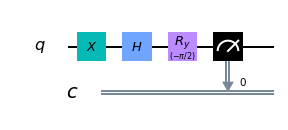

In [2]:
qc = QuantumCircuit(1,1) # create a circuit called qc, with 1 qubit, and 1 bit of output at the end
q,b = 0,0 # the qubit and bit are both labelled 0 when there is just one of each
qc.x(q) # apply an x gate to the qubit
qc.h(b) # apply an h gate to the qubit
qc.ry(-pi/2,q) # apply an ry gate for an angle of -pi/2 radians to the qubit
qc.measure(q,b) # extract a bit from the qubit, and write it to our output bit

qc.draw(output='mpl') # display the circuit as a diagram

The circuit is a set of instructions for a set of qubits. To actually get an output, we have to run the circuit: Either by simulating it on a standard digital computer or running it on actual quantum hardware. Simulations are only possible for a small number of qubits. Since we only deal with one qubit in this section, we will use this simulation option.

Results from quantum circuits can have some randomness present. For this reason, it is typical to run a circuit multiple times to get a range of samples. The following code runs our circuit, `qc`, for ten samples returns the resulting ten outputs as a list. Note that some elements of the syntax are there to handle uses cases that we don't need in work, and so need not be fully explained here.

In [3]:
execute( qc ,Aer.get_backend('qasm_simulator'),shots=10,memory=True).result().get_memory()

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

For this circuit, all the results came out `1`. As we will see, that won't always be the case.

### Properties of an initialized qubit

From now on, we'll always deal with two separate circuits for our qubit. One will be called `qc`, and contain all the manipulations we want to do before extracting an output.

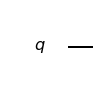

In [4]:
qc = QuantumCircuit(1)
qc.draw(output='mpl')

In this example we created a freshly initialized qubit, and  do nothing to it. This qubit therefore remains in its initialized state. To find out how this behaves, we need to extract an output.

We will do this using measurement circuits, which contain only what is needed to extract different types of output. The most commonly used method is the one we used before. It is is known as the z measurement, and can be implemented using the circuit `m_z` below.

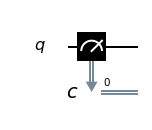

In [5]:
m_z = QuantumCircuit(1,1)
m_z.measure(0,0)
m_z.draw(output='mpl')

To extract an output from `qc` using the z measurement, we simply add the two circuits together to make one that we can run.

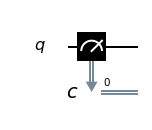

In [6]:
measured_circuit = qc+m_z
measured_circuit.draw(output='mpl')

Now we can run it, and observe the results.

In [7]:
execute( measured_circuit ,Aer.get_backend('qasm_simulator'),shots=10,memory=True).result().get_memory()

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

Here the output is always `0`. This is the result that occurs with certainty whenever a qubit in its initialized state is measured using `m_z`. For another perspective, we can use the x measurement. This is done with the following circuit, `m_x`.

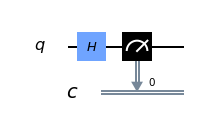

In [8]:
m_x = QuantumCircuit(1,1)
m_x.h(0)
m_x.measure(0,0)
m_x.draw(output='mpl')

As you might have noticed, this requires an extra element compared to `m_z`. This is because Qiskit doesn't allow us to ask for the x measurement directly, and so we need to use a little hack.

Example results when running the circuit with this form of measurements are as follows.

In [9]:
measured_circuit = qc + m_x
execute( measured_circuit ,Aer.get_backend('qasm_simulator'),shots=10,memory=True).result().get_memory()

['0', '1', '0', '0', '1', '1', '0', '1', '0', '1']

The result is random.

To see the probability, we need to extract more results. For this it is more convenient to get the results in a less verbose form, which simply lists each type of result along with the number of samples for which it occurred. The syntax for this is as follows, for 1000 samples.

In [10]:
execute( measured_circuit ,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()

{'1': 499, '0': 501}

Here the two possible results, `0` and `1`, both occur roughly 500 times out of the 1000 total samples. From this we can conclude that the results are completely random, giving `0` or `1` with 50/50 probability.

There are actually an infinite number of ways to extract an output from a qubit. But we can create a complete description by using just three. The x and z measurements are two of them. The final one is known as the y measurement.

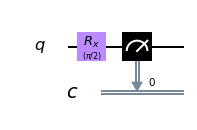

In [11]:
m_y = QuantumCircuit(1,1)
m_y.rx(pi/2,0)
m_y.measure(0,0)
m_y.draw(output='mpl')

Example results when running the circuit with this form of measurements are as follows.

In [12]:
measured_circuit = qc + m_y
execute( measured_circuit ,Aer.get_backend('qasm_simulator'),shots=10,memory=True).result().get_memory()

['0', '1', '0', '1', '1', '1', '0', '1', '0', '1']

Again, the output is random. With more samples, we can confirm that it is again 50/50.

With statistics on the results of these three types of measurement, we can fully characterize a single qubit state. Here we characterized the state taken by a qubit when initialized at the beginning of a circuit. The result was that such a qubit is certain to give an output of `0` for `m_z`, but gives random results for the other two.

Now we can investigate the properties of other possible qubit states. We will do this by applying all of the possible single qubit operations to a qubit.

### The `x` gate

First we will look at the effects of the operation known as the `x` gate.

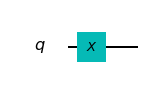

In [13]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')

Since we are now well acquainted with all the important ways to get an output, let's just run them all. The code below defines a function to do this for us for a given `qc`.

In [14]:
def show_results(qc):
    results_x = execute( qc + m_x ,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()
    print('Results for an x measurement:',results_x)
    results_y = execute( qc + m_y ,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()
    print('Results for a  y measurement:',results_y)
    results_z = execute( qc + m_z ,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()
    print('Results for a  z measurement:',results_z)

By running this function, we can look at the properties of the qubit after the `x` gate is applied.

In [15]:
show_results(qc)

Results for an x measurement: {'1': 502, '0': 498}
Results for a  y measurement: {'1': 516, '0': 484}
Results for a  z measurement: {'1': 1000}


Here we again get random results for `m_x` and `m_y`, but for `m_z` we are instead certain to get a `1`. The `x` gate simply flips the bit value that is output for `m_z`.

If we add another `x` to the circuit

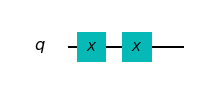

In [16]:
qc.x(0)
qc.draw(output='mpl')

the effect is to flip the value back to `0`.

In [17]:
show_results(qc)

Results for an x measurement: {'1': 496, '0': 504}
Results for a  y measurement: {'1': 503, '0': 497}
Results for a  z measurement: {'0': 1000}


### The `h`  and `rx` gates

The next operation to look at is the `h` gate.

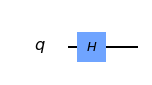

In [18]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output='mpl')

Using the function defined earlier, we can look at the properties of the resulting qubit state.

In [19]:
show_results(qc)

Results for an x measurement: {'0': 1000}
Results for a  y measurement: {'1': 494, '0': 506}
Results for a  z measurement: {'1': 529, '0': 471}


The effect is to make it so `m_x` is now the one whose output is certain. The output of `m_z` becomes random.This is an effect of what we might call the 'conservation of certainty' in quantum systems. In this case, it ensures that the fact that a qubit can now store a definite bit value in the results of `m_x` does not mean that it can store a second bit, since the ability to store a definite bit in the results of `m_z` has been removed.

A similar effect can be done using a gate known as `ry`. However, this requires an additional parameter: an angle expressed in radians. For now, we'll just use the angle $-\pi/2$.

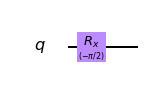

In [20]:
qc = QuantumCircuit(1)
qc.rx(-pi/2,q)
qc.draw(output='mpl')

This has the effect of making the outputs of `m_y` certain, and the other two random.

In [21]:
show_results(qc)

Results for an x measurement: {'1': 532, '0': 468}
Results for a  y measurement: {'0': 1000}
Results for a  z measurement: {'1': 493, '0': 507}


In both cases above, the qubit was certain to output `0`. It is also possible to make them certain to be `1`. The simplest way is to add an `x` gate at the beginning of each circuit.

With the gates we have so far, we are able to set the output of a qubit to be `0` or `1`, and also to change which types of output are certain and which are random. These represent the most basic kinds of operations, known as the Clifford gates.

### The Bloch sphere

The simplest way to move beyond the Clifford gates is to revisit `rx`, and simply use an angle that is not a multiple of $\pi/2$. Specifically, let's use $\pi/4$.

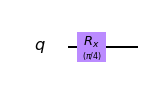

In [22]:
qc = QuantumCircuit(1)
qc.rx(pi/4,q)
qc.draw(output='mpl')

The results for this will not be as clear cut as we've seen before.

In [23]:
show_results(qc)

Results for an x measurement: {'1': 488, '0': 512}
Results for a  y measurement: {'1': 851, '0': 149}
Results for a  z measurement: {'1': 149, '0': 851}


Here we find that the resullts from `m_x` are completely random, but the other two are not. The results from `m_z` have some randomness, but with a bias towards `0`. The results from `m_y` are similarly random but with a bias towards `1`. The limited certainty of the qubit has therefore been shared between these two possible types of output. Both are mostly, but not completely certain of what output to give.

To full understand what is happening here, we need a way of visualizing the results. Specifically, we will plot the probability for the outcomes `0` and `1` for each of the three types of measurement on a 3D plot. Since this is well known to be a useful thing to do, it has a name: The Bloch sphere$^3$. Qiskit also has a tool to help us do it.

In [24]:
from qiskit.visualization import *

All we need do is get the results to be plotted. Below we define a function that runs all the required circuits, and then process the results to put them in the format needed by the plotting tool.

In [25]:
def get_bloch(qc):
    
    shots = 2**14 # number of samples used for statistics
    
    # get results for m_x, m_y and m_z
    results_x = execute( qc + m_x ,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()    
    results_y = execute( qc + m_y ,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()
    results_z = execute( qc + m_z ,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()
    
    # process the results
    bloch_vector = [] # list that will hold results in the form needed by the Bloch sphere
    for results in [results_x,results_y,results_z]:
        #calculate probabilities for outputs 0 and 1
        probs = {}
        for output in ['0','1']:
            if output in results:
                probs[output] = results[output]/shots
            else:
                probs[output] = 0
        # the bloch vector needs the different between these values
        bloch_vector.append( probs['0'] -  probs['1'] )
        
    return bloch_vector

We will first use it on an empty circuit: one that outputs a `0` with certainty for a z measurement, but random results for the others.

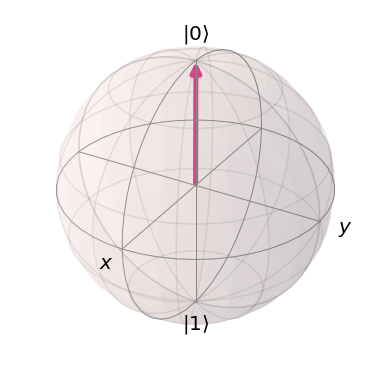

In [26]:
qc = QuantumCircuit(1,1)
plot_bloch_vector(get_bloch(qc))

The state of the qubit is represented as a point in 3D space. The x, y and z axes are used to show the probabilities for x, y and z measurements, respectively. If the output is certain to be `0` for each measurement, the qubit state is depicted on one extreme along the corresponding axis. If it is certain to be `1`, it is depicted on the other side. For a completely random result, it is in the middle.

In this case the certainty of a `0` for the z measurement puts the point at the very top of the image. For the x and y axes, the point lies in the middle. The state corresponds to the point labelled $|0\rangle$.

Now we will plot the state after a single `x`, for which the z measurement is certain to output `1`.

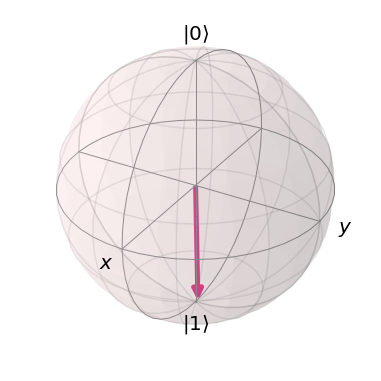

In [27]:
qc = QuantumCircuit(1,1)
qc.x(0)

plot_bloch_vector(get_bloch(qc))

Here the point is at the bottom. So the positions of these completely opposing outcomes are completely opposing points. The state in this case has been labelled $|1\rangle$.

We find similar for the states whose output is certain for the x measurement. Here is the state we know from before, where `h` is used to ensure that the qubit is certain to output `0` for the x measurement.

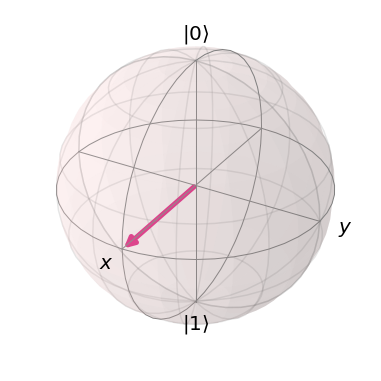

In [28]:
qc = QuantumCircuit(1,1)
qc.h(0)

plot_bloch_vector(get_bloch(qc))

Though the visualization does not include a specific label for this state, it is usually referred to as $|+\rangle$. This notation will be explained in more detail in the next section.

Now we will construct a circuit that is certain to output `1` for an x measurement. As we should expect, the corresponding point lies on the opposite side to the one above.

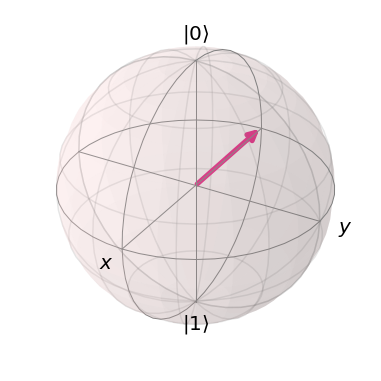

In [29]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)

plot_bloch_vector(get_bloch(qc))

We will now look at the effects of `rx` for a rangle of angles. First for an angle of $-\pi/8$

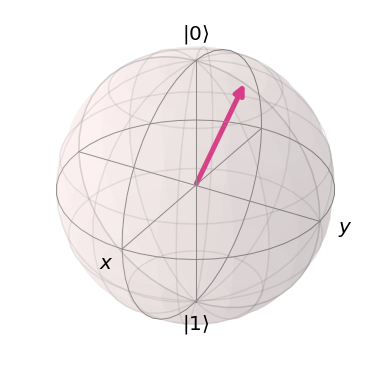

In [30]:
qc = QuantumCircuit(1,1)
qc.rx(-pi/8,0)

plot_bloch_vector(get_bloch(qc))

Now for $-\pi/4$.

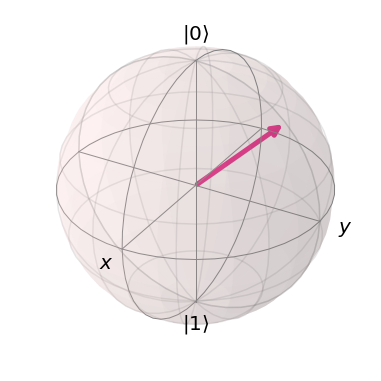

In [31]:
qc = QuantumCircuit(1,1)
qc.rx(-pi/4,0)

plot_bloch_vector(get_bloch(qc))

Finally for $-\pi/2$.

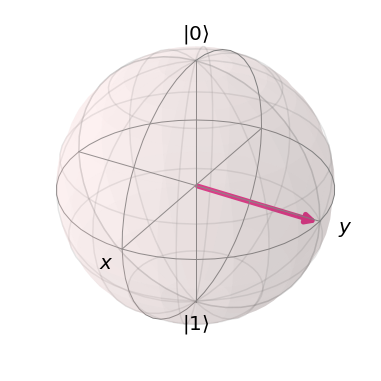

In [32]:
qc = QuantumCircuit(1,1)
qc.rx(-pi/2,0)

plot_bloch_vector(get_bloch(qc))

The qubit state appears bound to the surface of a sphere, which is the consequence of the restriction on the total amount of certainty that it may have.

In these results we see the z measurement results progressively lose certainty as the angle is increased. At the same time, the results of the y measurement gain certainty. For $-\pi/2$ we reach the point where the result for `m_y` becomes completely certain, just as we saw earlier.

With this visualization, the effects of `rx` becomes a simple rotation around the sphere. In fact, `rx` is specifically a rotation around the x axis by the angle given.

Since the angle is in radians, a full rotation corresponds to $2\pi$. This means that `rx` for some angle $\theta$ is equivalent in effect to that for any $2*\pi*n + \theta$ for integer $n$. It is also equivalent to a reverse rotation by an appropriate angle: specifically $-(2\pi-\theta)$.

Of particular interest is the angle $\pi$ (or equivalently $-\pi$). This is a half rotation, and so has the effect of flipping the state $|0\rangle$ to the state $|1\rangle$ and vice-versa. This is the exact same effect as the `x` gate. In fact, `x` is simply a shorthand name for `rx` with angle $\pi$.

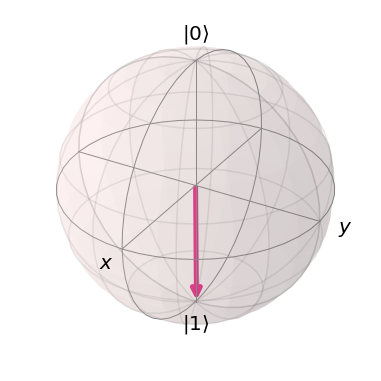

In [33]:
qc = QuantumCircuit(1,1)
qc.rx(pi,0)

plot_bloch_vector(get_bloch(qc))

In addition to the `rx` gate, which rotates around the x axis of the Bloch sphere, there are also gates `ry` and `rz`. These rotate around the y and z axes, respectively. For example, here is `ry` for $\pi/4$

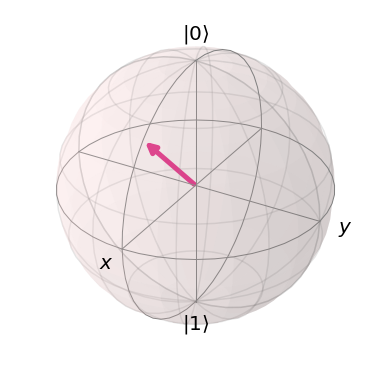

In [34]:
qc = QuantumCircuit(1,1)
qc.ry(pi/4,0)

plot_bloch_vector(get_bloch(qc))

and $\pi/2$

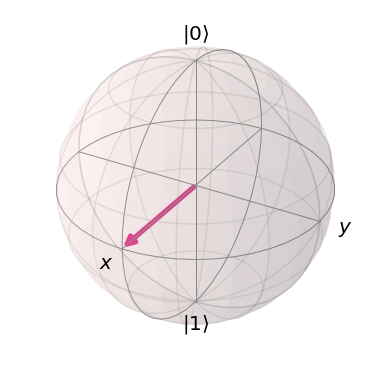

In [35]:
qc = QuantumCircuit(1,1)
qc.ry(pi/2,0)

plot_bloch_vector(get_bloch(qc))

This gate moves certainty between the results of `m_z` and `m_x`, in the same way as `rx` does for `m_z` and `m_y`.

For example, let's look at the effect of `rz` for an angle of $\pi/4$ after a `ry(pi/2,0)` rotation.

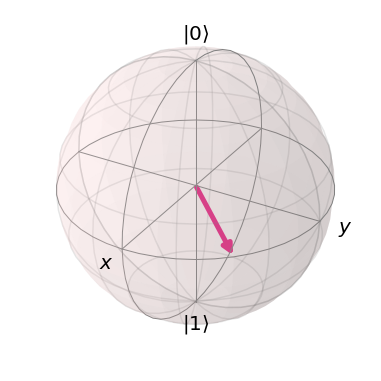

In [36]:
qc = QuantumCircuit(1,1)
qc.ry(pi/2,0)
qc.rz(pi/4,0)

plot_bloch_vector(get_bloch(qc))

And here is the same but for the angle $\pi/2$.

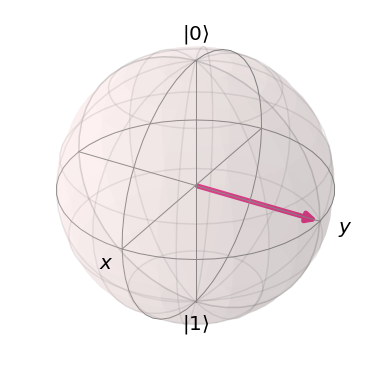

In [37]:
qc = QuantumCircuit(1,1)
qc.ry(pi/2,0)
qc.rz(pi/2,0)

plot_bloch_vector(get_bloch(qc))

These are the basic gates for the single qubit. Any other single qubit operations can be expressed in terms of these.

### Single qubit terrain generation

Using the properties of the single qubit, we will now devise an algorithm for terrain generation. This is based upon a proof-of-principle game created for the Ludum Dare 45 game jam$^3$.

To begin we will need to use tools for random number generation and visualization.

In [38]:
import random

from tools import plot_height

In this section we will be using [MicroQiskit](https://github.com/quantumjim/MicroQiskit/blob/master/README.md). This is a light version of Qiskit with a lot less features. However, it is also much faster at single qubit simulations.

In [39]:
from microqiskit import QuantumCircuit, simulate
from math import pi

We also need to decide the size of the map we'll generate, which is determined by the following parameter, `L`. Obviosuly, the map will take longer to render the bigger it is.

In [40]:
L = 15

Now we will define the central function behind this procedural generation algorithm: `get_height(x,y)`. This will simply tell us the height of the terrain at any given point, specified by the coordinates `x` and `y`.

The height in this function is calculated using a single qubit quantum circuit. Specifically, gates are applied that depend upon the coordinates of the point. These are chosen quite arbitrarily. The reader is encouraged to play around with alternatives. 

The gates are chosen such that the circuit created for any given `x,y` is quite similar to that for its neighbours. Specifically, the circuit consists of an `rx` and a `ry` rotation. The angle for `rx` changes by $\pm\pi/32$ as we move from point to point along the x axis of the map. Similarly, the angle for `ry` changes by $\pm\pi/32$ as we move along the y axis of the map.

Here we are using the x coordinate of the map to determine the `rx` rotation, and the y coordinate for `ry`. This is an arbitrary choice, and does not reflect any deep meaning. There is no connection between the x and y axes of the map and those of the Bloch sphere. It was chosen simply because it seemed like a nice choice. Again, the reader is encouraged to play around with alternatives. 

After these gates, a z measurement is performed and the probability of getting the output `1` is calculated. This probability could itself be used as the height. However, it was found that more appealing terrain results when instead using `p`$^2$ as the height. Again, this is a rather arbitrary choice and the reader can try different approaches.

In [41]:
def get_height_temp_1(x,y):
    
    qc = QuantumCircuit(1,1)
    
    # perform rotations, whose angles depend on x and y
    qc.x(0)
    # low frequency rotations to create island shape
    qc.rx((1/32)*x*pi,0) 
    qc.ry((1/32)*y*pi,0)
    
    # perform a z measurement
    qc.measure(0,0)
    
    # determine the probability of a 1
    try:
        p = simulate(qc,get='counts',shots=10000)['1']/10000
        # the corresponding command in standard Qiskit is
        #p = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()['1']/10000
    except:
        p = 0
    
    # return p^2 as the height
    return p**2

To see what kind of terrain this generates, we need to calculate the height of all points on our map. The code below does this, and stores them in a dictionary called `height`.

In [42]:
height = {}
for x in range(-L,L+1):
    for y in range(-L,L+1):
        height[x,y] = get_height_temp_1(x,y)

With this we can draw the map using a suitable function. Specifically, we use the `plot_height` function imported above.

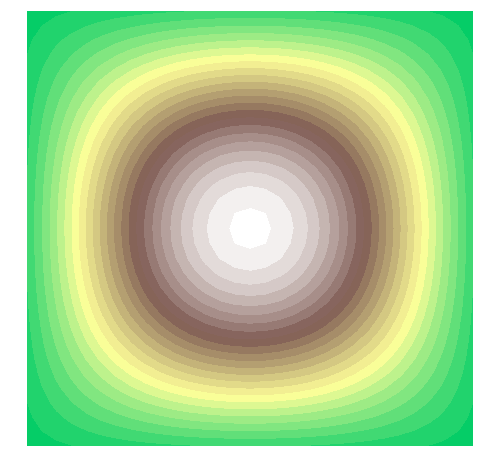

In [43]:
plot_height(height)

Though this is unmistakably some terrain, it clearly isn't very interesting or realistic.

To make it nicer, we can add some more gates. As one example, we could break up the single peak by adding gates for which the angles of rotation make larger changes as we move from one point to its neighbours.

In [44]:
# a redefinition of the `get_height` function
def get_height_temp_2(x,y):
    
    qc = QuantumCircuit(1,1)
    
    # perform rotations, whose angles depend on x and y
    qc.x(0)
    # low frequency rotations
    qc.rx((1/32)*x*pi,0) 
    qc.ry((1/32)*y*pi,0)
    qc.rx((1/16)*x*pi,0)
    qc.ry((1/16)*y*pi,0)
    qc.rx((1/8)*x*pi,0)
    qc.ry((1/8)*y*pi,0)
    
    # perform a z measurement
    qc.measure(0,0)
    
    # determine the probability of a 1
    try:
        p = simulate(qc,get='counts',shots=10000)['1']/10000
        # the corresponding command in standard Qiskit is
        #p = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()['1']/10000
    except:
        p = 0
    
    # return p^2 as the height
    return p**2

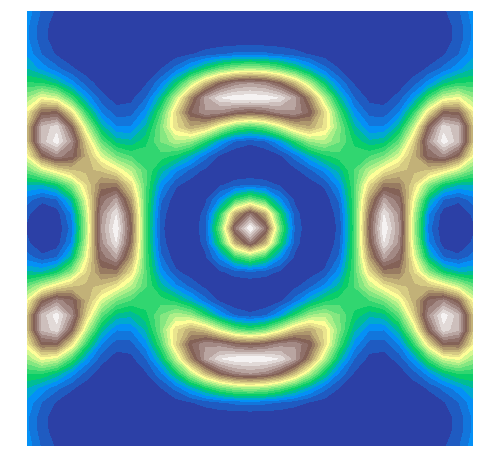

In [45]:
height = {}
for x in range(-L,L+1):
    for y in range(-L,L+1):
        height[x,y] = get_height_temp_2(x,y)
        
plot_height(height)

This is still not very realistic. For that we should add a randomly generated seed. There are many ways that the process could be seeded, so we again need to make an arbitrary choice. Since this method was developed for a game jam, the choice in this case is case was inspired by the theme of the jam. In this case the theme of Ludum Dare 45 was "Start with nothing". For this reason the game starts with no seed, and hence no terrain. As the player explores, their (presumably random) path was used to generate the world as they explore it.

Specifically, we do this by keeping track of how far the player is from the starting point. Once they reach a certain distance for the first time, their position is recorded in a list named `seed`. Looking at an entry `seed[d]` of this list will then give us the coordinates `xs` and `ys` where the player first reached the distance `d`. These positions are then used to calculate the height value for every point at distance `d` from the origin.

This process is implemented in the following function. Note that the method here is not exactly the same as in the game. Instead a more straightforward variant is presented. This is largely the same as the first `get_height` function defined above, but with `x` replaced by `(x+xs)/2` and `y` by `(y+ys)/2`.

In [46]:
def get_height_temp_3(x,y,seed):
    
    qc = QuantumCircuit(1,1)
    
    # get seed positions for this distance
    d = abs(x) + abs(y)
    (xs,ys) = seed[d]
    
    # perform rotations, whose angles depend on x and y
    qc.x(0)
    # low frequency rotations to create island shape
    qc.rx((1/32)*((x+xs)/2)*pi,0) 
    qc.ry((1/32)*((y+ys)/2)*pi,0)
    
    # perform a z measurement
    qc.measure(0,0)
    
    # determine the probability of a 1
    try:
        p = simulate(qc,get='counts',shots=10000)['1']/10000
        # the corresponding command in standard Qiskit is
        #p = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()['1']/10000
    except:
        p = 0
    
    # return p^2 as the height
    return p**2

Before we can look at the kind of terrain generated by this process, we need to generate a seed. Since this document is not the place for an interactive game, we will not have it generated here by actual gameplay. Instead we generate a random walk that can be used for the seed.

In [47]:
def generate_seed_temp(L):
    L = 2*L # rescale to account for distance to corners in square map
    seed = [(0,0)]
    x,y = 0,0
    d = 0
    while d<L:
        # propose a random step
        r_ax = random.choice(['x','y'])
        r_step = random.choice([+1,-1])
        if r_ax=='x':
            xp = x + r_step
            yp = y
        else:
            xp = x
            yp = y + r_step
        d = abs(xp)+abs(yp)
        # accept and record new position if it leads to an increase in distance
        if d>=len(seed):
            x,y = xp,yp
            seed += [(x,y)]*(int(d)+1-len(seed))    
    return seed

At each step, this walk randomly decides whether to move in the x or y axis. Whichever it chooses, it moves in the positive direction.

Below is an example of such a seed. As we should expect, it is a list of coordinates that get increasing far from the center.

In [48]:
seed = generate_seed_temp(L)
print(seed)

[(0, 0), (0, -1), (0, -2), (0, -3), (1, -3), (1, -4), (2, -4), (2, -5), (3, -5), (3, -6), (4, -6), (4, -7), (5, -7), (5, -8), (6, -8), (6, -9), (6, -10), (6, -11), (6, -12), (7, -12), (7, -13), (7, -14), (7, -15), (8, -15), (9, -15), (9, -16), (9, -17), (9, -18), (10, -18), (10, -19), (10, -20)]


Now we have enough information to take a look at our new terrain.

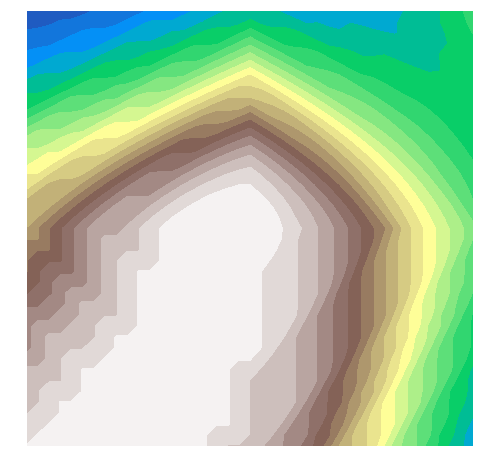

In [49]:
L = 20
seed = generate_seed_temp(L)
height = {}
for x in range(-L,L+1):
    for y in range(-L,L+1):
        height[x,y] = get_height_temp_3(x,y,seed)
        
plot_height(height)

This terrain has features much more like real terrain. However, the nature of the seed means that it is much better at making long ridges that it is at making islands.

If we want an island generator based on similar principles, we can generate a seed made up of multiple walks. The function below generates four walks, each constrained to walk randomly towards a different corner of the map.

In [50]:
def generate_seed(L):
    L = int((2*L**2)**0.5) # rescale to account for distance to corners in square map
    seed = [[(0,0)] for _ in range(4)]
    walker = [[0,0] for _ in range(4)]
    d = [0 for _ in range(4)]
    for j in range(4):
        while d[j]<L:
            if random.random()<0.5:
                walker[j][0] += 2*((j%2)==1)-1
            else:
                walker[j][1] += 2*((j>1)==1)-1
            d[j] = abs(walker[j][0])+abs(walker[j][1])
            if d[j]>=len(seed[j]):
                seed[j] += [tuple(walker[j])]*(d[j]+1-len(seed[j]))    
    return seed

The following `get_height` function using this seed to generate an island. This is done by calculating `d`, the distance from the given point to the origin, and `dw`, the distance of the point to the nearest walker. By using rotations whose angle increases with `d`, we can create an island by reducing the height as we move away from the origin. With rotations based on `dw`, we create valleys'

In [51]:
def get_height(x,y,seed):
    
    qc = QuantumCircuit(1,1)
    
    # get seed positions for this distance
    d = int( (x**2+y**2)**0.5 )
    
    dw = []
    for j, walker in enumerate(seed):
        dw.append( ((x-walker[d][0])**2+(y-walker[d][1])**2)**0.5 )
    min_dw = min(dw)
    
    # perform rotations, whose angles depend on x and y
    qc.x(0)
    # low frequency rotations to create island shape
    qc.rx((1/80)*d*pi,0)
    qc.ry((1/35)*min_dw*pi,0)
    qc.rx((1/80)*d*pi,0)
    
    # perform a z measurement
    qc.measure(0,0)
    
    # determine the probability of a 1
    try:
        p = simulate(qc,get='counts',shots=10000)['1']/10000
        # the corresponding command in standard Qiskit is
        #p = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()['1']/10000
    except:
        p = 0
    
    # return p^2 as the height
    return p**2

Here is an example of an island generated in this way.

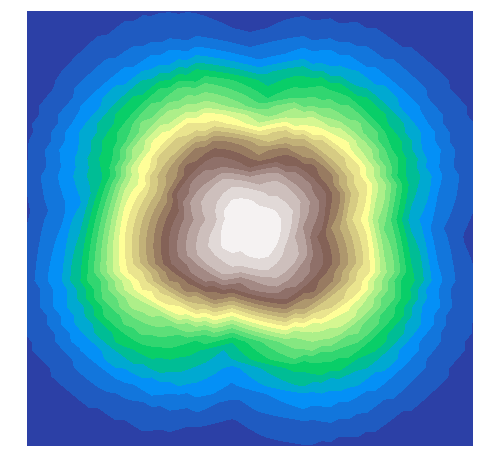

In [52]:
L = 25
seed = generate_seed(L)
height = {}
for x in range(-L,L+1):
    for y in range(-L,L+1):
        height[x,y] = get_height(x,y,seed)
        
plot_height(height)

There are many more things that could be tried, and many parameters that could be tweaked. Further experimentation is left for the interested reader.

## References

1. ["Uncertainty principle", Wikipedia.](https://en.wikipedia.org/wiki/Uncertainty_principle)
2. [Qiskit website.](https://qiskit.org)
3. ["Genesis" game for Ludum Dare 45, Wootton (2019).](https://ldjam.com/events/ludum-dare/45/genesis-1)

## Towards a combined approach

We will use islands generated in this way in the following sections. For these purposes we will need a 200x200 grid. Nevertheless we will still generate the terrain using `L=25`, as above. We will just scale the coordinates to get a better resultion on an island of this size.

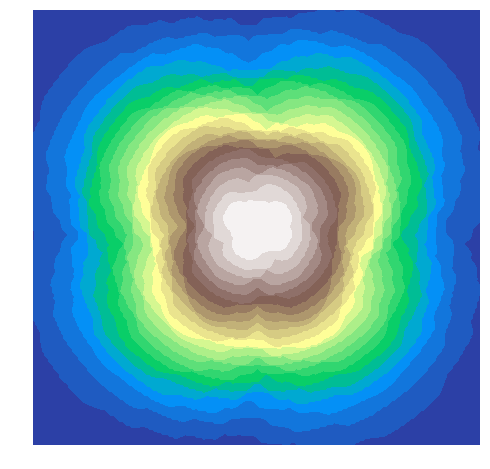

In [53]:
size = 200
L = 25
seed = generate_seed(L)
island = {}
for x in range(size):
    for y in range(size):
        island[x,y] = get_height((x-size/2)/4,(y-size/2)/4,seed)
        
plot_height(island)

with open('island.py', 'w') as file:
    file.write('island='+str(island))